In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf=DecisionTreeClassifier(random_state=156) #길이는 보통 짝수보단 홀수 (짝수로 하면 오류가 많이 발생함)

iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,
                                               test_size=0.20,random_state=11)

dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=156)

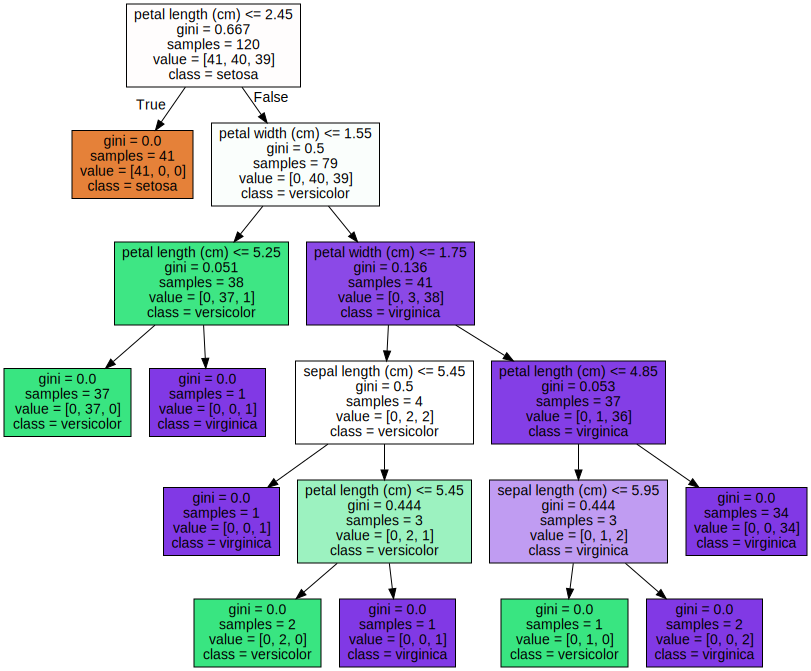

In [2]:
from sklearn.tree import export_graphviz #min_samples_leaf는 웬만하면 1이상(default=1)
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,\
               feature_names=iris_data.feature_names,impurity=True,filled=True)

import graphviz

with open("tree.dot")as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [3]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

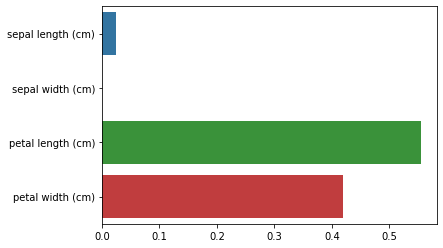

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
    
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)
